In [1]:
# importing libraries
import sys
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from scripts import QC_Columns
sns.set(style="white", context="talk")

%matplotlib inline

Reading data
- number of records: 12032
- number of columns: 915
- some rows skipped because of datatype errors

In [2]:
code_book = QC_Columns.Codebook()
list_of_col_names = code_book.get_list_of_columns()
for i in list_of_col_names:
    print(i)

blood_sugar_qc
diabetes_qc
diabetes_self_reported_qc
diabetes_12months_qc
diabetes_treatment_qc
diabetes_treat_curr_qc
diabetes_treat_insulin_qc
diabetes_treat_pills_qc
diabetes_treat_diet_qc
diabetes_treat_weight_loss_qc
diabetes_treat_other_qc
diabetes_meds_specify_qc
diabetes_traditional_qc
diabetes_history_qc
mother_diabetes_qc
father_diabetes_qc
brother_diabetes_qc
brother_2_diabetes_qc
brother_3_diabetes_qc
brother_4_diabetes_qc
sister_diabetes_qc
sister_2_diabetes_qc
sister_3_diabetes_qc
sister_4_diabetes_qc
son_diabetes_qc
son_2_diabetes_qc
son_3_diabetes_qc
son_4_diabetes_qc
daughter_diabetes_qc
daughter_2_diabetes_qc
daughter_3_diabetes_qc
daughter_4_diabetes_qc
other_diabetes
other_diabetes_qc
other_diabetes_specify
other_diabetes_specify_qc
stroke_qc
stroke_diagnosed_qc
transient_ischemic_attack_qc
weakness_qc
numbness_qc
blindness_qc
half_vision_loss_qc
understanding_loss_qc
expression_loss_qc
bp_measure_qc
hypertension_qc
hypertension_12months_yn_qc
hypertension_treatment

In [3]:
data_link = "../data/all_sites_v2.5.3.22.csv"
awigen_data = pd.read_csv(data_link, usecols= list_of_col_names, warn_bad_lines=True, error_bad_lines=False, low_memory=False, quoting=csv.QUOTE_NONE)

In [27]:
awigen_data.head()
awigen_data.to_csv("../data/codebookdata.csv", index=False)

In [5]:
nrows = 12032
print("skipped ", nrows - awigen_data.shape[0], " rows")

('skipped ', 0, ' rows')


In [6]:
df = [x for _, x in awigen_data.groupby('site_qc')]

In [7]:
agincourt = df[0]
dikgale   = df[1]
nairobi   = df[2]
nanoro    = df[3]
navrongo  = df[4]
soweto    = df[5]

###### Agincourt

In [8]:
agincourt.head()

,site_qc,age,blood_sugar_qc,diabetes_qc,diabetes_self_reported_qc,diabetes_12months_qc,diabetes_treatment_qc,diabetes_treat_curr_qc,diabetes_treat_insulin_qc,diabetes_treat_pills_qc,...,know_type_kidney_disease_qc,type_kidney_disease_qc,low_kidney_function_qc,kidney_family_qc,family_kidney_mother_qc,family_kidney_father_qc,family_kidney_other_qc,family_kidney_other_specify,kidney_family_type_qc,family_kidney_type_qc
5,Agincourt,60,0.0,0.0,0.0,-555.0,-555.0,-555.0,-555.0,-555.0,...,-555.0,-555,-555.0,0.0,-555.0,-555.0,-555.0,NaN,-999.0,-555
7,Agincourt,69,0.0,0.0,0.0,-555.0,-555.0,-555.0,-555.0,-555.0,...,-555.0,-555,-555.0,2.0,-999.0,-999.0,-999.0,NaN,-999.0,-999
9,Agincourt,53,1.0,0.0,0.0,-555.0,-555.0,-555.0,-555.0,-555.0,...,-555.0,-555,-555.0,0.0,-555.0,-555.0,-555.0,NaN,-999.0,-555
25,Agincourt,64,1.0,0.0,0.0,-555.0,-555.0,-555.0,-555.0,-555.0,...,-555.0,-555,-555.0,0.0,-555.0,-555.0,-555.0,NaN,-999.0,-555
32,Agincourt,57,0.0,0.0,0.0,-555.0,-555.0,-555.0,-555.0,-555.0,...,-555.0,-555,-555.0,0.0,-555.0,-555.0,-555.0,NaN,-999.0,-555


In [15]:
bins = [0, 39, 60, 70, 150]
labels = ['0-39', '40-60', '61-70', '70 plus']
agincourt['age_categories'] = pd.cut(awigen_data['age'], bins=bins, labels=labels)

In [19]:
agincourt[['age', 'age_categories']]

,age,age_categories
5,60,40-60
7,69,61-70
9,53,40-60
25,64,61-70
32,57,40-60
46,53,40-60
48,45,40-60
53,54,40-60
60,66,61-70
68,52,40-60


In [17]:
for i in range(len(agincourt.index)) :
    print("Nan in row ", i , " : " ,agincourt.iloc[i]['study_id'], " : " , agincourt.iloc[i].isnull().sum())

KeyError: 'study_id'

In [24]:
# takes in dataframe and list of columns
def cross_tabs(agincourt, li):
    for l in li:
        print("_____________",l,"____________")
        g = pd.crosstab(agincourt['age_categories'], agincourt[l], margins=True, margins_name='Total', normalize='index').round(4)*100
        print(g)
        print("\n\n")

cross_tabs(agincourt, list_of_col_names)

('_____________', 'blood_sugar_qc', '____________')
blood_sugar_qc    0.0    1.0   2.0
age_categories                    
40-60           53.52  46.48  0.00
61-70           48.85  50.96  0.19
70 plus         48.10  51.90  0.00
Total           51.45  48.51  0.04



('_____________', 'diabetes_qc', '____________')
diabetes_qc       0.0    1.0
age_categories              
40-60           96.25   3.75
61-70           90.00  10.00
70 plus         90.62   9.38
Total           93.81   6.19



('_____________', 'diabetes_self_reported_qc', '____________')
diabetes_self_reported_qc    0.0    1.0
age_categories                         
40-60                      96.04   3.96
61-70                      89.62  10.38
70 plus                    90.42   9.58
Total                      93.56   6.44



('_____________', 'diabetes_12months_qc', '____________')
diabetes_12months_qc  -999.0  -555.0   0.0     1.0  
age_categories                                      
40-60                   0.00   96.25   

ValueError: No objects to concatenate

In [23]:
# takes in dataframe and list of columns
def cross_tabs_counts(agincourt, li):
    for l in li:
        print("_____________",l,"____________")
        g = pd.crosstab(agincourt['age_categories'], agincourt[l], margins_name='Total')
        print(g)
        print("\n\n\n")

cross_tabs_counts(agincourt, list_of_col_names)

('_____________', 'blood_sugar_qc', '____________')
blood_sugar_qc  0.0  1.0  2.0
age_categories               
40-60           784  681    0
61-70           254  265    1
70 plus         241  260    0




('_____________', 'diabetes_qc', '____________')
diabetes_qc      0.0  1.0
age_categories           
40-60           1410   55
61-70            468   52
70 plus          454   47




('_____________', 'diabetes_self_reported_qc', '____________')
diabetes_self_reported_qc   0.0  1.0
age_categories                      
40-60                      1406   58
61-70                       466   54
70 plus                     453   48




('_____________', 'diabetes_12months_qc', '____________')
diabetes_12months_qc  -999.0  -555.0   0.0     1.0  
age_categories                                      
40-60                      0    1410      15      40
61-70                      4     468      14      34
70 plus                    0     454      20      27




('_____________', 'diabetes_trea

In [12]:
missing_bmi = agincourt[agincourt.bmi_qc == -999]
print("Agincourt missing bmi: ", missing_bmi['bmi_qc'].shape[0])

bmi_qc = agincourt[agincourt.bmi_qc >= 0]
print("Agincourt with bmi: ", bmi_qc['bmi_qc'].shape[0] , "\n")
print(bmi_qc['bmi_qc'].describe())

('Agincourt missing bmi: ', 545)
('Agincourt with bmi: ', 1941, '\n')
count    1941.000000
mean       27.223287
std         6.667631
min        14.200000
25%        22.100000
50%        26.140000
75%        31.320000
max        68.020000
Name: bmi_qc, dtype: float64


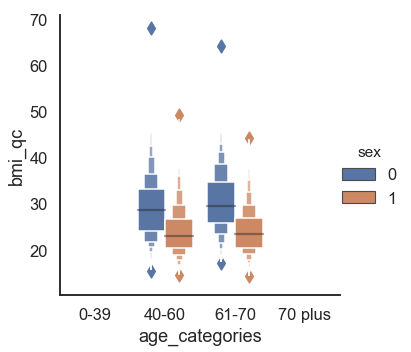

In [13]:
sns.catplot(x="age_categories", y="bmi_qc", hue="sex",
            kind="boxen", data=bmi_qc);